# Event-Studies com Tratamento Contínuo

Prof. Daniel de Abreu Pereira Uhr


## Conteúdo

* Introdução
* Parâmetros Causais de Interesse
* Parâmetros do Tipo Estudo de Evento
* Identificação dos Parâmetros de Estudo de Evento
* Aplicação em Python


## Referências

* Brantly Callaway, Andrew Goodman-Bacon, and Pedro H. C. Sant’Anna. 2024. "Event-Studies with a Continuous Treatment." American Economic Review, PAPERS AND PROCEEDINGS, May, 114(5): 1-8.

### Introdução

Nessa aula vamos aprender sobre o artigo "Event-Studies with a Continuous Treatment" de Callaway, Goodman-Bacon e Sant'Anna (2024). O artigo discute a estimação de parâmetros causais em estudos de eventos com tratamento contínuo. Vamos tentar abordar os principais pontos do artigo e aplicar os conceitos em Python.

Um pesquisador pode analisar um desenho de Diferenças em Diferenças (DiD) de dois grupos e dois períodos sem precisar fazer muitas escolhas. Supondo que o tratamento não afete os resultados antes de sua iniciação, o efeito médio do tratamento sobre os tratados é identificado sob uma suposição de tendências paralelas pela diferença entre as mudanças médias dos resultados entre os grupos: um parâmetro, uma suposição de tendências paralelas e um estimador.

No entanto, um desenho DiD mais complexo exige que os pesquisadores façam mais decisões. Este artigo baseia-se em Callaway, Goodman-Bacon e Sant'Anna (2024) e considera as escolhas que um pesquisador enfrenta ao usar métodos DiD para estudar um tratamento que começa em diferentes momentos (escalonado) e afeta as unidades em diferentes graus (intensidade do tratamento). Discutimos maneiras transparentes de agregar o grande conjunto de parâmetros causais que surgem nesse contexto, transmitindo a heterogeneidade por tempo de evento e entre doses, e mostramos como essas escolhas podem simplificar a estimação e a inferência. Em contraste com os parâmetros de especificações lineares comuns com efeitos fixos de duas vias, nossos parâmetros resumidos não sofrem com problemas de ponderação negativa/não transparente.

### Parâmetros Causais de Interesse
Considere um conjunto de dados em painel com $N$ unidades indexadas por $i$, e $T$ períodos de tempo indexados por $t$. Denotamos o período em que a unidade $i$ é tratada pela primeira vez por $G_i \in G = \{2, \ldots, T, \infty\}$, onde $G_i = \infty$ significa que uma unidade não é tratada até $T$ (“nunca tratada”). Como focamos em configurações escalonadas, $G_i$ pode ser interpretado como o “grupo de tempo de tratamento”. Deixe $D_i \in D \subseteq [0, d_H]$, onde $d_H < \infty$, representar a “dose” (ou intensidade) do tratamento que a unidade $i$ recebeu quando foi tratada pela primeira vez. Interpretamos $D_i$ como o “grupo de dose”.

Adotamos o framework de resultado potencial e escrevemos $Y_{i,t}(g, d)$ como o resultado potencial da unidade $i$ no tempo $t$ se essa unidade fosse tratada pela primeira vez no período $g$, com dose $d$. Para unidades que permanecem não tratadas até o último período de tempo dos dados disponíveis, escrevemos $Y_{i,t}(0) = Y_{i,t}(\infty, 0)$. Essa notação define os efeitos médios do tratamento específicos para grupo-tempo-dose:

$$
ATT(g, t, d) = E[Y_t(g, d) - Y_t(0) \mid G = g, D = d].
$$

$ATT(g, t, d)$ é o efeito médio do tratamento no período $t$ de (i) ser tratado no período $g$ e (ii) experimentar a dose $d$ versus dose zero, entre aqueles no grupo de tempo $g$ que receberam a dose $d$. Os parâmetros $ATT(g, t, d)$ descrevem o que algum tratamento realmente alcançou. Eles incorporam muitos tipos de heterogeneidade que os pesquisadores frequentemente desejam relatar e interpretar. Para um dado $g$ e $t$, os efeitos médios em diferentes doses descrevem a “função dose-resposta” do grupo $g$. Para um dado $d$ e $g$, as diferenças nos efeitos causais médios ao longo de $t$ representam a dinâmica do efeito do tratamento. Finalmente, para um dado $d$ e $t$, diferentes efeitos médios por $g$ capturam uma combinação de dinâmica e diferenças no efeito de ser tratado em um determinado momento.

Com tratamentos contínuos, outra classe de parâmetros causais que pode ser de interesse são os parâmetros de resposta causal média, definidos como:

$$
ACR(g, t, d) = \frac{\partial E[Y_t(g, \tilde{d}) \mid G = g]}{\partial \tilde{d}} \Bigg|_{\tilde{d} = d}.
$$

$ACR(g, t, d)$ é a resposta causal média a uma mudança marginal na dose em $d$ para todas as unidades no grupo de tempo $g$. Parâmetros $ACR$ respondem a perguntas causais sobre qual nível de tratamento importa mais ou menos. Esse parâmetro de inclinação também é uma função de $g$, $t$ e $d$, e pode variar nessas dimensões de maneiras significativas.

Em configurações de DiD escalonadas com tratamentos contínuos, pode não ser prático estimar uma função do tipo dose-resposta para cada $t$ e $g$. Assim, os pesquisadores podem querer agregar esses “blocos de construção” por tempo desde o tratamento (tempo de evento; $e = t - g$) e/ou entre doses. Aqui, focamos em resumir os $ATT(g, t, d)$ ao longo de ambas as margens e discutimos como essas escolhas de agregação moldam a estimação.

### Parâmetros do Tipo Estudo de Evento

Começamos discutindo as agregações de estudo de evento que fazem a média sobre as dosagens de tratamento. Para um dado grupo $g$ e tempo $t$, seja $ATT_o(g, t) = E[ATT(g, t, D) \mid G = g, D > 0]$, que é o efeito médio do tratamento para aquele grupo em um determinado ponto no tempo. Em seguida, definimos:

$$
ATT_{es}(e) = E[ATT_o(G, G + e) \mid G + e \in [2, T], D > 0]
$$

que denota o efeito médio do tratamento entre aqueles que foram expostos a qualquer tratamento por exatamente $e$ períodos, condicional a serem observados participando do tratamento por aquele número de períodos ($G + e \in [2, T]$) e sendo tratados em algum momento ($D > 0$). Quando $D$ é binário, $ATT_{es}(e)$ se reduz ao coeficiente do estudo de evento considerado por Callaway e Sant'Anna (2021).

Os parâmetros acima agregam completamente as doses e, portanto, não descrevem a dinâmica dos efeitos do tratamento para grupos de “alta dose” ou “baixa dose”, por exemplo. Para abordar essas questões, podemos agregar parcialmente as doses em cada grupo e período de tempo para formar os parâmetros de estudo de evento “conscientes da dose”:

$$
ATT_{es_{d1,d2}}(e) = E[ATT_o(G, G + e) \mid d1 \leq D \leq d2, G + e \in [2, T]],
$$

onde $ATT_o(g, g + e) = E[ATT(g, t, D) \mid G = g, d1 \leq D \leq d2]$, e $0 < d1 \leq d2$ são limites dentro do suporte de $D$. Escolhendo diferentes intervalos, podemos avaliar como as dinâmicas do efeito médio do tratamento variam entre grupos de dosagem. Por exemplo, poderíamos definir $d1$ e $d2$ para dividir as unidades tratadas em aquelas com doses acima ou abaixo da mediana. Naturalmente, pode-se considerar partições de dose mais refinadas, mas recomendamos prestar atenção ao tamanho efetivo da amostra em cada partição escolhida.

Uma característica do $ATT_{es_{d1,d2}}(e)$ é que ele agrega entre várias dosagens de tratamento. Em algumas aplicações, no entanto, os pesquisadores podem querer relatar heterogeneidade detalhada com respeito a $d$. Agregar sobre alguns tempos de evento pode facilitar o relato das funções estimadas de dose-resposta. Para formalizar essa ideia, sejam $e1$ e $e2$ dois tempos de evento pós-tratamento tais que $0 \leq e1 \leq e2$ e

$$
ATT_{es_{e1,e2}}(d) = \frac{1}{e2 - e1 + 1} \sum_{e=e1}^{e2} E[ATT(G, G + e, d) \mid G + e2 \in [2, T], D = d]
$$

seja o efeito médio do tratamento de receber a dose $d$, entre todas as unidades que foram tratadas por pelo menos $e2$ períodos, calculado como a média ao longo dos tempos de evento $e1$ até $e2$. Quando $e2 = e1 = e$, $ATT_{es_{e1,e2}}(d)$ fornece uma função dose-resposta para todas as unidades que foram tratadas por exatamente $e$ períodos. Quando $e2 > e1$, no entanto, $ATT_{es_{e1,e2}}(d)$ faz a média dessas curvas ao longo do tempo de evento e pode ser usado para resumir respostas de dose em termos de efeitos de “curto prazo” (ex.: $e1 = 0, e2 = 2$) e de “longo prazo” (ex.: $e1 = 3, e2 = 4$). Ao construir essas curvas de resposta à dose com média sobre os tempos de evento, impomos que os dados estejam balanceados no tempo de evento dentro da janela de $e1$ a $e2$ ($G + e2 \in [2, T]$), para que mudanças de composição não sejam uma preocupação, mas é possível relaxar essa restrição.

A seguir, mostramos que essas funcionais de estudo de evento são identificadas sob suposições tradicionais de DiD.


### Identificação dos Parâmetros de Estudo de Evento

As seguintes suposições são suficientes para identificar os parâmetros de estudo de evento. Seja $D_{+} = D \setminus \{0\}$ o subconjunto positivo do suporte de $D$. Seja $\Delta Y_t = Y_t - Y_{t-1}$ e defina $W_t = D1\{t \geq G\}$.

* **SUPOSIÇÃO 1:** Os dados observados consistem de $\{Y_{i,1}, \ldots, Y_{i,T}, D_i, G_i\}_{i=1}^{n}$, que são independentes e identicamente distribuídos.

* **SUPOSIÇÃO 2:** (i) $D^+ = [d_L, d_U]$ com $0 < d_L < d_U < \infty$, (ii) $P(D = 0) > 0$ e $dF_{D|G}(d | g) > 0$ para todos $(g, d) \in (G \setminus \{\infty\}) \times D^+$, (iii) Para todo $g \in (G \setminus \{\infty\})$ e $t = 2, \ldots, T$, $E[\Delta Y_t | G = g, D = d]$ é continuamente diferenciável em $d$ sobre $D^+$.

* **SUPOSIÇÃO 3:** (i) Para todo $g \in G$ e $t = 1, \ldots, T$ com $t < g$, $Y_{i,t}(g, d) = Y_{i,t}(0)$ a.s., (ii) $W_{i,1} = 0$ a.s. e para $t = 2, \ldots, T$, $W_{i,t-1} = d$ implica que $W_{i,t} = d$ a.s.

* **SUPOSIÇÃO 4:** Para todos $(g, g') \in G \times G$, $t = 2, \ldots, T$, e $(d, d') \in D \times D$, $E[\Delta Y_t(0) | G = g, D = d] = E[\Delta Y_t(0) | G = g', D = d']$.

A Suposição 1 afirma que temos dados de painel. A Suposição 2 afirma que temos um conjunto de unidades que nunca são tratadas e que o tratamento é contínuo; se não houver unidades nunca tratadas, podemos restringir a análise aos períodos $t = 1, \ldots, \bar{G} - 1$, onde $\bar{G} = \max\{G_i : G_i < \infty\}$ é o tempo do último grupo tratado. A Suposição 3 impõe a não-antecipação e que o tratamento é escalonado. Finalmente, a Suposição 4 é uma condição de tendências paralelas que afirma que, na ausência de tratamento, a evolução média dos desfechos potenciais não tratados é a mesma entre grupos de tempo-dosagem. Essas suposições são semelhantes às de Callaway, Goodman-Bacon e Sant'Anna (2024).

Seja $U_t$ uma variável binária genérica que assume o valor um se uma unidade fizer parte de um grupo de comparação “limpo” escolhido pelo usuário no tempo $t$; por exemplo, o indicador de não-tratamento $U_t = 1\{G > t \cup D = 0\}$. Definimos $\theta_o(g, t) = E[Y_t - Y_{g-1} | G = g, d_1 \leq D \leq d_2] - E[Y_t - Y_{g-1} | U_{\max\{t, g-1\}} = 1, d_1 \leq D \leq d_2 \cup D = 0]$, e $\theta_o(g, t) = \theta_{d_L, d_H}(g, t)$.

Além disso, para cada unidade $i$ tal que $G_i + e_2 \in [2, T]$, seja $\tilde{Y}_i(g) = 1\{G_i = g\} \sum_{e=e_1}^{e_2} (Y_{i, g+e} - Y_{i, g-1}) / (e_2 - e_1 + 1) - E[Y_{g+e} - Y_{g-1} | U_{g+e_2} = 1] / (e_2 - e_1 + 1)$.

* **TEOREMA 1:** Sob as Suposições 1 a 4, (i) $ATT_{es}(e) = E[\theta_o(G, G + e) | G + e \in [2, T], D > 0]$, (ii) $ATT_{es_{d1,d2}}(e) = E[\theta_o(G, G + e) | G + e \in [2, T], d_1 \leq D \leq d_2]$, e (iii) $ATT_{es_{e1,e2}}(d) = E[\tilde{Y}_{e1,e2}(G) | G + e_2 \in [2, T], D = d]$.

O Teorema 1(i) mostra que podemos essencialmente ignorar a intensidade do tratamento ao focar nos parâmetros do tipo estudo de evento $ATT_{es}(e)$ e, portanto, usar os estimadores de configurações DiD escalonadas com um tratamento binário para estimar esses parâmetros. Por exemplo, com $U_t = 1\{G > t \cup D = 0\}$, pode-se usar os estimadores de estudo de evento de Callaway e Sant'Anna (2021) com as unidades não tratadas como grupo de comparação; isso envolve “rotular” unidades com $D = 0$ como $G = \infty$.

O Teorema 1(ii) mostra que isso ainda é o caso quando se deseja apresentar estudos de evento que apenas agregam parcialmente entre dosagens. Mais especificamente, para estimar $ATT_{es_{d1,d2}}(e)$, é necessário primeiro submeter as observações apenas às unidades que receberam dose de tratamento entre $d_1$ e $d_2$, ou aquelas que receberam dose zero, $D = 0$. Dentro desse subconjunto de unidades, pode-se então “ignorar” a intensidade do tratamento e proceder com a estimação de $ATT_{es}(e)$.

O Teorema 1(iii) tem uma abordagem ligeiramente diferente das partes anteriores, pois $ATT_{es_{e1,e2}}(d)$ é um parâmetro de resposta à dose. No entanto, também possui implicações práticas importantes. Mais especificamente, destaca que se pode confiar nos estimadores de curva de resposta à dose propostos por Callaway, Goodman-Bacon e Sant'Anna (2024) para configurações de dois períodos, pois $Y_{e1,e2}(g)$ essencialmente envolve apenas um período pré e pós-tratamento. Em configurações com um grande número de unidades transversais, pode-se utilizar o estimador não paramétrico orientado por dados de Chen, Christensen e Kankanala (2023) discutido por Callaway, Goodman-Bacon e Sant'Anna (2024). Quando o tamanho da amostra é limitado, pode-se escolher um modelo paramétrico flexível (por exemplo, splines com um número fixo de nós) para aproximar a curva de resposta à dose.


### Aplicação em Python

Bartik et al. (2019a) usam uma variável de tratamento escalonada e não binária para estudar os efeitos econômicos locais da fraturação hidráulica (fracking). O fracking é possível apenas em áreas com formações de xisto subterrâneas que podem ser fraturadas para liberar hidrocarbonetos. Os custos e rendimentos do fracking—“prospectividade”—dependem de fatores geológicos que variam continuamente entre áreas dentro de uma determinada formação de xisto. Modificamos ligeiramente o desenho de pesquisa DiD em Bartik et al. (2019a) explorando a variação no momento da atividade de fracking em diferentes formações de xisto de 2001 a 2014 ($G_i$, coletados manualmente pelos autores) e a variação contínua na pontuação de prospectividade entre condados ($D_i$, adquirida da Rystad Energy); ver Bartik et al. (2019b). Denominamos os condados com pontuação de prospectividade zero como “nunca tratados” e definimos $G_i = \infty$ para eles. Focamos no logaritmo do emprego total do condado como nosso principal desfecho, e usamos as unidades ainda não tratadas como grupo de comparação em todas as estimativas abaixo.

A Figura 1 apresenta os resultados para $ATT_{es}(e)$ usando dois conjuntos de $(d_1, d_2)$: a curva laranja define $d_1 = 0.20$ e $d_2 = 3.95$, onde 0.20 e 3.95 são, respectivamente, a exposição mínima e mediana ao fracking entre os condados com exposição positiva. Chamamos esse grupo de “baixa dose”. A curva azul define $d_1$ ligeiramente acima de 3.95 e $d_2 = 9.35$, onde o último é a exposição máxima ao fracking. Chamamos esse grupo de “alta dose”. As tendências pré-tratamento parecem paralelas para ambos os grupos por 11 anos antes do fracking, apoiando a suposição de tendências paralelas. Os condados de “baixa dose” têm efeitos de tratamento que não são estatisticamente diferentes de zero até três anos após o início do fracking, quando eles são cerca de 2%. Os condados de “alta dose”, por outro lado, apresentam efeitos médios maiores que crescem de 2% no ano após o fracking para 7% de emprego mais alto quatro anos depois.

<div style="text-align:center;">
    <img src="images\DDCT2.png"  alt="Imagem" style="width: 700px;"/>
</div>

A Figura 2 apresenta os resultados para as curvas de resposta à dose com médias ao longo do tempo, $ATT_{es}(d)$: a curva laranja define $e_1$ e $e_2$ para 0 e 2 (“curto prazo”) e a curva azul usa 3 e 4 (“longo prazo”). Usamos splines cúbicos com nós internos nos percentis 25, 50 e 75 da dose. Esta figura ecoa as conclusões da Figura 1 de que os efeitos de curto prazo são menores do que os de longo prazo e que os condados com pontuações de prospectividade mais altas têm maiores efeitos no emprego provenientes do fracking. Essa agregação, no entanto, mostra onde na distribuição da prospectividade esses efeitos são maiores. Por exemplo, no longo prazo, os efeitos médios no emprego são igualmente grandes para todos os condados com pontuações acima de cerca de 4.


<div style="text-align:center;">
    <img src="images\DDCT3.png"  alt="Imagem" style="width: 700px;"/>
</div>
**Notas:**
Linhas sólidas denotam estimativas de $ATT_{es}(d)$ usando Callaway, Goodman-Bacon e Sant’Anna (2024). As áreas sombreadas são intervalos de confiança pontuais de 95%. A curva laranja (azul) define $e_1$ e $e_2$ para 0 e 2 (3 e 4).

**Figura 2. Curvas de Resposta à Dose Estimadas para Efeitos de Curto e Longo Prazo**

Como se deve esperar, as estimativas do estudo de evento na Figura B1 são uma média das estimativas do estudo de evento “alta dose” e “baixa dose” da Figura 1 no texto principal (reproduzidas como Figura B2 para facilitar comparações). Na Figura B1, pode-se ver que as tendências pré-tratamento não paralelas não são uma grande preocupação e que os efeitos de longo prazo são mais fortes que os de curto prazo.

Passamos, em seguida, para as estimativas das curvas de resposta à dose com médias ao longo do tempo, $ATT_{es}(d)$. A Figura 2 no texto principal apresenta os resultados para essas curvas usando os estimadores de Callaway, Goodman-Bacon e Sant’Anna (2024) com splines cúbicos: a curva laranja define $e_1$ e $e_2$ para 0 e 2 (“curto prazo”), e a curva azul usa 3 e 4 (“longo prazo”). Reproduzimos a Figura 2 como Figura B4 abaixo para facilitar comparações. Semelhante ao acima, esperamos que alguns pesquisadores também queiram relatar uma curva de resposta à dose “geral”, por exemplo, definindo $e_1 = 0$ e $e_2 = 4$. Relatamos essas estimativas na Figura B3.

A Figura B3 ecoa as conclusões dos resultados de “longo prazo” da curva de resposta à dose na Figura B4, mostrando que os condados com pontuações de prospectividade mais altas têm maiores efeitos no emprego provenientes do fracking. A Figura B3 também destaca que os efeitos médios de emprego nos primeiros 4 anos após o fracking são igualmente grandes para todos os condados com pontuações acima de cerca de 2.5; não são apenas os condados mais adequados para fracking que impulsionam seus efeitos no mercado de trabalho.

**Notas:**
Linhas sólidas denotam estimativas de $ATT_{es}(d)$ usando Callaway, Goodman-Bacon e Sant’Anna (2024). As áreas sombreadas são intervalos de confiança pontuais de 95%. A curva laranja (azul) define $e_1$ e $e_2$ para 0 e 2 (3 e 4).

**Figura B4. Curvas de Resposta à Dose Estimadas para Efeitos de Curto e Longo Prazo**

**Códigos para replicar os resultados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from scipy import stats
from sklearn.preprocessing import SplineTransformer
import matplotlib.ticker as ticker

In [2]:
import pyreadstat

# Carregar os dados
data_bcgk, meta = pyreadstat.read_dta("C:/Users/danie/OneDrive/Área de Trabalho/Continuous Treatment/data/processed/bcgk_replication.dta")

# Ordenar por 'i' e 't'
data_bcgk.sort_values(['i', 't'], inplace=True)

# Calcular a mediana das dosagens positivas
median_d = data_bcgk.loc[data_bcgk['d'] > 0, 'd'].median()

# Manipulação de dados usando pandas
data_bcgk = (
    data_bcgk[data_bcgk['t'] != 2015]
    .assign(
        d_above_treated_median=lambda df: (df['d'] > median_d).astype(int),
        d_below_treated_median=lambda df: ((df['d'] <= median_d) & (df['d'] > 0)).astype(int)
    )
    .dropna(subset=['y'])
    .assign(i=lambda df: df['i'].astype(int))
)

In [3]:
import pandas as pd

def make_balanced_panel(df, id_col, time_col):
    # Identificar ids e tempos únicos
    ids = df[id_col].unique()
    times = df[time_col].unique()
    
    # Criar um índice completo
    index = pd.MultiIndex.from_product([ids, times], names=[id_col, time_col])
    
    # Reindexar para criar o painel completo
    df_balanced = df.set_index([id_col, time_col]).reindex(index).reset_index()
    
    # Remover todos os indivíduos com qualquer NaN em qualquer período
    df_balanced = df_balanced.dropna()
    
    return df_balanced

data_bcgk = make_balanced_panel(data_bcgk, 'i', 't')

In [4]:
# Obter os IDs que aparecem exatamente 25 vezes (completos) na base
complete_ids = data_bcgk['i'].value_counts()
extra_id = complete_ids[complete_ids != 25].index.tolist()

print("ID(s) extra:", extra_id)
# Remover o ID extra
data_bcgk = data_bcgk[data_bcgk['i'] != 8014]

ID(s) extra: [8014]


In [5]:
import numpy as np
import pandas as pd

# Subconjunto de dados para 'acima da mediana tratada' ou 'nunca tratados'
data_bcgk_above_median = data_bcgk[
    (data_bcgk['d_above_treated_median'] == 1) | (data_bcgk['d'] == 0)
].copy()
data_bcgk_above_median['G'] = np.where(data_bcgk_above_median['d'] == 0, np.inf, data_bcgk_above_median['G'])

# Subconjunto de dados para 'abaixo da mediana tratada' ou 'nunca tratados'
data_bcgk_below_median = data_bcgk[
    (data_bcgk['d_below_treated_median'] == 1) | (data_bcgk['d'] == 0)
].copy()
data_bcgk_below_median['G'] = np.where(data_bcgk_below_median['d'] == 0, np.inf, data_bcgk_below_median['G'])

In [6]:
import pandas as pd
import numpy as np

# Função para criar dados para a função de resposta de dose
def data_pre_dose(data, g_values, e1=0, e2=2):
    results = []
    for g in g_values:
        temp_df = data.copy()
        
        # Definir G_cs e event_time_cs
        temp_df['G_cs'] = np.where(temp_df['d'] == 0, np.inf, temp_df['G'])
        temp_df['event_time_cs'] = temp_df['t'] - temp_df['G_cs']
        
        # Filtrar com as condições específicas para G_cs
        temp_df = temp_df[(temp_df['G_cs'] == g) | (temp_df['d'] == 0)]
        temp_df = temp_df[(temp_df['G'] + e2 <= temp_df['t'].max()) | (temp_df['G'] == np.inf)]
        
        # Definir pre_period e max_post
        temp_df['pre_period'] = g - 1
        temp_df['max_post'] = g + e2
        temp_df = temp_df[(temp_df['t'] <= temp_df['max_post']) & (temp_df['t'] >= temp_df['pre_period'])]
        
        # Calcular dY baseado no pre_period
        temp_df['dY'] = temp_df['y'] - temp_df.groupby('i')['y'].transform(
            lambda x: x[temp_df['t'] == temp_df['pre_period']].iloc[0] if temp_df['t'].eq(temp_df['pre_period']).any() else np.nan
        )

        # Filtrar valores após pre_period
        temp_df = temp_df[temp_df['t'] > temp_df['pre_period']]
        
        # Calcular média de dY para unidades NYT
        temp_df['mean_dY_NYT'] = temp_df.groupby('t')['dY'].transform(lambda x: x[temp_df['G_cs'] > temp_df['t']].mean())
        
        # Calcular ddY
        temp_df['ddY'] = temp_df['dY'] - temp_df['mean_dY_NYT']
        
        # Filtrar para o período do evento
        temp_df = temp_df[(temp_df['G_cs'] == g) & (temp_df['event_time_cs'] >= e1) & (temp_df['event_time_cs'] <= e2)]
        
        # Agrupar e calcular a média de ddY e d
        grouped = temp_df.groupby(['i', 'G_cs']).agg(
            ddY=('ddY', 'mean'),
            d=('d', 'mean')
        ).reset_index().rename(columns={'G_cs': 'G'})
        
        results.append(grouped)
    
    # Concatenar resultados
    return pd.concat(results, ignore_index=True)

# Executar a função para SR, LR e 0-4
data_bcgk_SR = data_pre_dose(data=data_bcgk, g_values=data_bcgk['G'].unique(), e1=0, e2=2)
data_bcgk_LR = data_pre_dose(data=data_bcgk, g_values=data_bcgk['G'].unique(), e1=3, e2=4)
data_bcgk_0_4 = data_pre_dose(data=data_bcgk, g_values=data_bcgk['G'].unique(), e1=0, e2=4)

In [7]:
import numpy as np

# Calcular os quantis de dose para evitar extrapolação
quantiles_d = np.quantile(data_bcgk[data_bcgk['d'] > 0]['d'], [0.05, 0.95])
min_d_pos = data_bcgk[data_bcgk['d'] > 0]['d'].min()
max_d_pos = data_bcgk[data_bcgk['d'] > 0]['d'].max()

# Exibir os resultados
print("Quantis de dose (5% e 95%):", quantiles_d)
print("Mínimo de doses positivas:", min_d_pos)
print("Máximo de doses positivas:", max_d_pos)

Quantis de dose (5% e 95%): [2.3499999  6.30999994]
Mínimo de doses positivas: 0.20000000298023224
Máximo de doses positivas: 9.34000015258789


In [8]:
data_bcgk_above_median['t1'] = data_bcgk_above_median['t']
data_bcgk_above_median['i1'] = data_bcgk_above_median['i']
data_bcgk_above_median['t1'] = data_bcgk_above_median['t'].astype(int)

# Definir os indices (estrutura de painel)
data_bcgk_above_median.set_index(['i1', 't1'], inplace=True)

In [9]:
import random
import numpy as np

# Definir a semente
seed = 20240103
random.seed(seed)
np.random.seed(seed)

In [10]:
from differences import ATTgt

# Estimar o ATT para o subconjunto acima da mediana
att_above = ATTgt(
    data=data_bcgk_above_median,
    cohort_name='G',
    base_period='universal'
)
att_above.fit(formula='y', control_group='not_yet_treated', est_method='reg')

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\differences\tools\panel_validation.py:379: UserWarning: 73 entity-events ignored because the event (cohort) date
 is after the end of the panel for the specific entity, as if never treated
  warn(
Computing ATTgt [workers=1]   100%|████████████████████| 200/200 [00:01<00:00, 108.86it/s]


ATTgtResult                                           \
                                     analytic pointwise conf. band             
                                ATT std_error                lower     upper   
cohort base_period time                                                        
2001   2000        1990   -0.142205  0.040233            -0.221059 -0.063350   
                   1991   -0.121562  0.049333            -0.218254 -0.024871   
                   1992   -0.114786  0.049457            -0.211719 -0.017853   
                   1993   -0.127998  0.031842            -0.190408 -0.065589   
                   1994   -0.123318  0.025870            -0.174023 -0.072613   
...                             ...       ...                  ...       ...   
2012   2011        2010    0.014087  0.010463            -0.006421  0.034595   
                   2011    0.000000       NaN                  NaN       NaN   
                   2012   -0.002027  0.005318            -0.012450  0.008396   
                   2013    0.008617  0.013804            -0.018438  0.035672   
                   2014    0.000084  0.022281            -0.043586  0.043754   

                                           
                                           
                        zero_not_in_cband  
cohort base_period time                    
2001   2000        1990                 *  
                   1991                 *  
                   1992                 *  
                   1993                 *  
                   1994                 *  
...                                   ...  
2012   2011        2010                    
                   2011                    
                   2012                    
                   2013                    
                   2014                    

[200 rows x 5 columns]

In [11]:
# Agregar os resultados para obter o estudo de eventos
es_above = att_above.aggregate(type_of_aggregation="event", overall=False)

In [12]:
# Verificar as colunas disponíveis no DataFrame es_above
print(es_above.columns)

MultiIndex([('EventAggregation',                     '',               'ATT'),
            ('EventAggregation',             'analytic',         'std_error'),
            ('EventAggregation', 'pointwise conf. band',             'lower'),
            ('EventAggregation', 'pointwise conf. band',             'upper'),
            ('EventAggregation', 'pointwise conf. band', 'zero_not_in_cband')],
           )


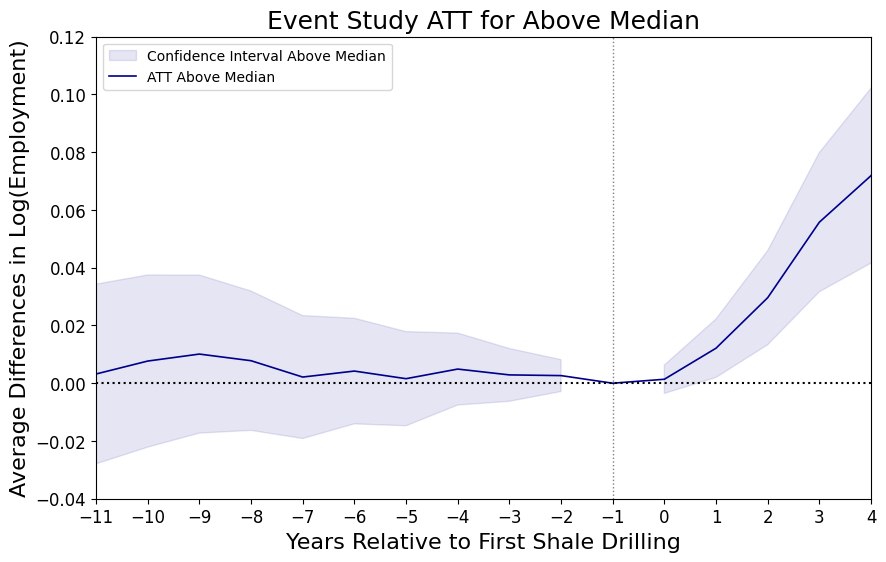

In [13]:
# Definir os dados de `es_above`
relative_period_above = es_above.index.get_level_values('relative_period')
ATT_above = es_above[('EventAggregation', '', 'ATT')]
std_error_above = es_above[('EventAggregation', 'analytic', 'std_error')]
lower_above = es_above[('EventAggregation', 'pointwise conf. band', 'lower')]
upper_above = es_above[('EventAggregation', 'pointwise conf. band', 'upper')]

# Plotar o gráfico para `es_above` com a paleta azulada
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotar o intervalo de confiança e linha de ATT para `es_above`
plt.fill_between(relative_period_above, lower_above, upper_above, color="darkblue", alpha=0.1, label='Confidence Interval Above Median')
plt.plot(relative_period_above, ATT_above, color="darkblue", linewidth=1.2, label='ATT Above Median')

# Linhas de referência
plt.axvline(x=-1, color='grey', linestyle="dotted", linewidth=1)
plt.axhline(y=0, color="black", linestyle="dotted")

# Configurações dos eixos
plt.xlabel("Years Relative to First Shale Drilling", fontsize=16)
plt.ylabel("Average Differences in Log(Employment)", fontsize=16)
plt.xticks(range(-11, 5, 1), fontsize=12)
plt.yticks([round(x * 0.02, 2) for x in range(-2, 7)], fontsize=12)  # Ajuste para intervalos de y
plt.ylim(-0.04, 0.12)
plt.xlim(-11, 4)


# Remover linhas de grade
plt.grid(False)

# Estilo do gráfico
plt.legend()
plt.title("Event Study ATT for Above Median", fontsize=18)

# Mostrar o gráfico
plt.show()

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\differences\tools\panel_validation.py:379: UserWarning: 73 entity-events ignored because the event (cohort) date
 is after the end of the panel for the specific entity, as if never treated
  warn(
Computing ATTgt [workers=1]   100%|████████████████████| 200/200 [00:01<00:00, 118.23it/s]


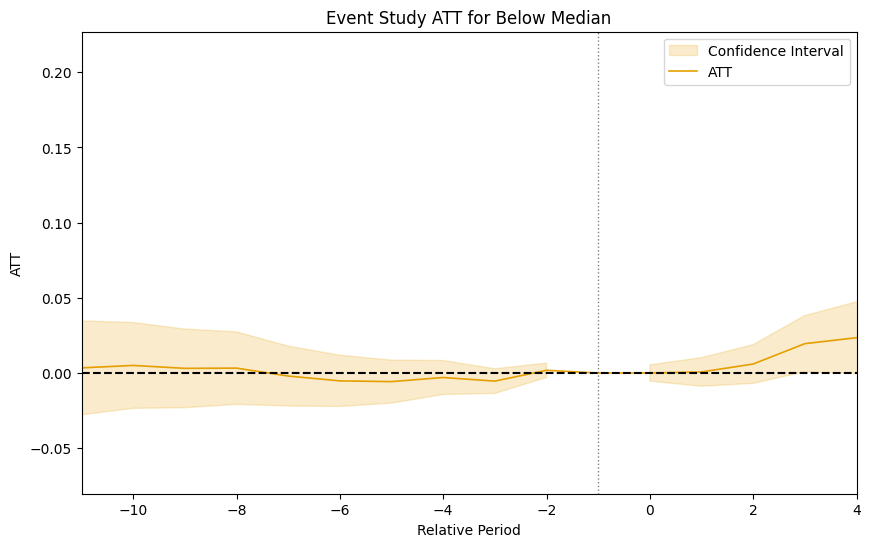

In [14]:
# Preparar os dados para o subconjunto abaixo da mediana
data_bcgk_below_median['t1'] = data_bcgk_below_median['t']
data_bcgk_below_median['i1'] = data_bcgk_below_median['i']
data_bcgk_below_median['t1'] = data_bcgk_below_median['t'].astype(int)

# Definir a estrutura de painel com os índices apropriados
data_bcgk_below_median.set_index(['i1', 't1'], inplace=True)

from differences import ATTgt

# Estimar o ATT para o subconjunto abaixo da mediana
att_below = ATTgt(
    data=data_bcgk_below_median,
    cohort_name='G',
    base_period='universal'
)
att_below.fit(formula='y', control_group='not_yet_treated', est_method='reg')

# Agregar os resultados para obter o estudo de eventos
es_below = att_below.aggregate(type_of_aggregation="event", overall=False)

# Acessar colunas específicas no MultiIndex
relative_period = es_below.index  # Supondo que o índice representa os períodos relativos
ATT = es_below[('EventAggregation', '', 'ATT')]
std_error = es_below[('EventAggregation', 'analytic', 'std_error')]
lower = es_below[('EventAggregation', 'pointwise conf. band', 'lower')]
upper = es_below[('EventAggregation', 'pointwise conf. band', 'upper')]
# Plotando o Estudo de Eventos para o subconjunto "Below Median" com o padrão amarelado
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Usar coloração amarelada para o intervalo de confiança e linha
plt.fill_between(relative_period, lower, upper, color="#E69F00", alpha=0.2, label='Confidence Interval')
plt.plot(relative_period, ATT, color="#E69F00", linewidth=1.2, label='ATT')

# Linhas de referência
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=-1, color='grey', linestyle="dotted", linewidth=1)

# Ajustar os limites do eixo x para focar no intervalo -11 a 4
plt.xlim(-11, 4)

# Remover linhas de grade
plt.grid(False)

# Personalizar o gráfico
plt.xlabel("Relative Period")
plt.ylabel("ATT")
plt.title("Event Study ATT for Below Median")
plt.legend()

plt.show()

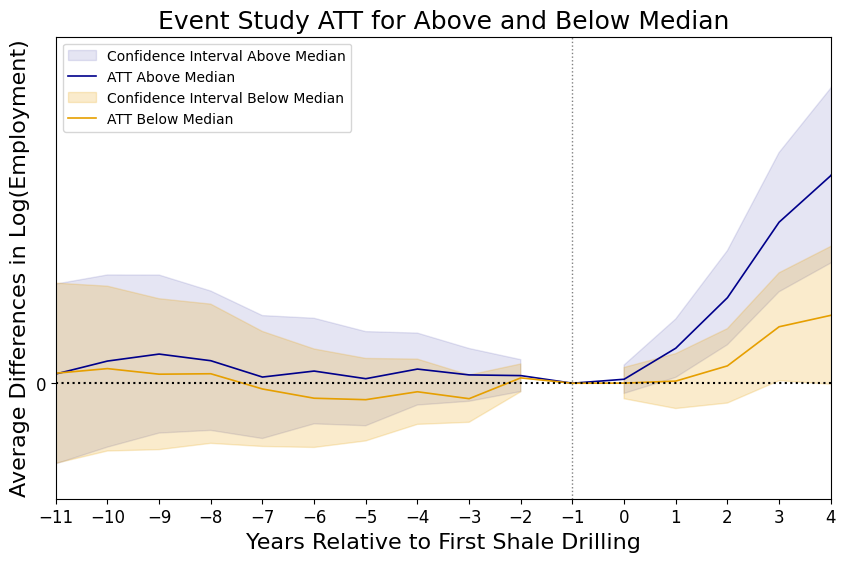

In [15]:
# Definir os dados de `es_above`
relative_period_above = es_above.index.get_level_values('relative_period')
ATT_above = es_above[('EventAggregation', '', 'ATT')]
std_error_above = es_above[('EventAggregation', 'analytic', 'std_error')]
lower_above = es_above[('EventAggregation', 'pointwise conf. band', 'lower')]
upper_above = es_above[('EventAggregation', 'pointwise conf. band', 'upper')]

# Definir os dados de `es_below`
relative_period_below = es_below.index.get_level_values('relative_period')
ATT_below = es_below[('EventAggregation', '', 'ATT')]
std_error_below = es_below[('EventAggregation', 'analytic', 'std_error')]
lower_below = es_below[('EventAggregation', 'pointwise conf. band', 'lower')]
upper_below = es_below[('EventAggregation', 'pointwise conf. band', 'upper')]

# Agora, plotar os gráficos juntos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotar os resultados de `es_above`
plt.fill_between(relative_period_above, lower_above, upper_above, color="darkblue", alpha=0.1, label='Confidence Interval Above Median')
plt.plot(relative_period_above, ATT_above, color="darkblue", linewidth=1.2, label='ATT Above Median')

# Plotar os resultados de `es_below`
plt.fill_between(relative_period_below, lower_below, upper_below, color="#E69F00", alpha=0.2, label='Confidence Interval Below Median')
plt.plot(relative_period_below, ATT_below, color="#E69F00", linewidth=1.2, label='ATT Below Median')

# Linhas de referência
plt.axvline(x=-1, color='grey', linestyle="dotted", linewidth=1)
plt.axhline(y=0, color="black", linestyle="dotted")

# Configurações dos eixos
plt.xlabel("Years Relative to First Shale Drilling", fontsize=16)
plt.ylabel("Average Differences in Log(Employment)", fontsize=16)
plt.xticks(range(-11, 5, 1), fontsize=12)
plt.yticks([round(x, 2) for x in list(range(-4, 13, 2))], fontsize=12)
plt.ylim(-0.04, 0.12)
plt.xlim(-11, 4)

# Remover linhas de grade
plt.grid(False)

# Estilo do gráfico
plt.legend()
plt.title("Event Study ATT for Above and Below Median", fontsize=18)

# Mostrar o gráfico
plt.show()


In [16]:
import matplotlib.pyplot as plt

# Definindo os dados com o MultiIndex correto
relative_period_all = es_all.index.get_level_values('relative_period')
ATT_all = es_all[('EventAggregation', '', 'ATT')]
lower_all = es_all[('EventAggregation', 'pointwise conf. band', 'lower')]
upper_all = es_all[('EventAggregation', 'pointwise conf. band', 'upper')]
conf_low_all = es_all[('EventAggregation', 'analytic', 'std_error')]

# Configuração da figura
plt.figure(figsize=(10, 6))

# Adicionar intervalo de confiança e linha de tendência
plt.fill_between(relative_period_all, lower_all, upper_all, color="lightblue", alpha=0.3, label="Confidence Interval")
plt.plot(relative_period_all, ATT_all, color="black", linewidth=0.5, alpha=0.8, label="Estimate")
plt.errorbar(relative_period_all, ATT_all, yerr=conf_low_all, fmt='o', color='red', ecolor='red', capsize=2)

# Linhas de referência e formatação
plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(x=-1, color="grey", linestyle="dotted", linewidth=1)

# Configuração dos eixos
plt.xlabel("Years Relative to First Shale Drilling", fontsize=12)
plt.ylabel("Average Differences in Log(Employment)", fontsize=12)
plt.title("Event Study ATT for All Units", fontsize=12)

# Limites e rótulos personalizados
plt.ylim(-0.04, 0.12)
plt.xlim(-11, 4)
plt.xticks(range(-11, 5, 1), fontsize=10)
plt.yticks([round(x, 2) for x in np.arange(-0.04, 0.13, 0.02)], fontsize=10)

# Remover linhas de grade
plt.grid(False)

# Exibir legenda
plt.legend()

# Exibir gráfico
plt.show()



NameError: name 'es_all' is not defined

In [17]:
import matplotlib.pyplot as plt

# Definindo os dados com o MultiIndex correto
relative_period_all = es_all.index.get_level_values('relative_period')
ATT_all = es_all[('EventAggregation', '', 'ATT')]
p_conf_low_all = es_all[('EventAggregation', 'pointwise conf. band', 'lower')]
p_conf_high_all = es_all[('EventAggregation', 'pointwise conf. band', 'upper')]

# Configuração da figura
plt.figure(figsize=(10, 6))

# Adicionar intervalo de confiança e linha de tendência
plt.fill_between(relative_period_all, p_conf_low_all, p_conf_high_all, color="#009E73", alpha=0.1, label="Confidence Interval")
plt.plot(relative_period_all, ATT_all, color="#009E73", linewidth=1.2, label="Estimate")

# Linhas de referência e formatação
plt.axhline(y=0, color="black", linestyle="dotted")
plt.axvline(x=-1, color="grey", linestyle="dotted", linewidth=1)

# Configuração dos eixos
plt.xlabel("Years Relative to First Shale Drilling", fontsize=20)
plt.ylabel("Average Differences in Log(Employment)", fontsize=20)
plt.title("Event Study ATT for All Units (Styled)", fontsize=20)

# Limites e rótulos personalizados
plt.ylim(-0.04, 0.12)
plt.xlim(-11, 4)
plt.xticks(range(-11, 5, 1), fontsize=20)
plt.yticks([round(x, 2) for x in np.arange(-0.04, 0.13, 0.02)], fontsize=20)


# Remover linhas de grade
plt.grid(False)

# Exibir legenda
plt.legend()

# Exibir gráfico
plt.show()


NameError: name 'es_all' is not defined

In [18]:
# Importar pacotes necessários
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrix

# Definir a semente para reprodutibilidade
np.random.seed(20240103)

# Carregar dados (substitua o caminho pelo caminho correto do arquivo de dados)
# data_bcgk_SR = pd.read_csv('path_to_data_SR.csv')
# data_bcgk_LR = pd.read_csv('path_to_data_LR.csv')
# data_bcgk_0_4 = pd.read_csv('path_to_data_0_4.csv')

# Função para calcular splines cúbicas e ajustar o modelo
def fit_cubic_spline(data, dependent_var, independent_var, cluster_col):
    # Definir os quantis e criar splines cúbicas para a variável independente
    knots = np.quantile(data[independent_var], [0.25, 0.5, 0.75])
    spline_terms = dmatrix(f"bs({independent_var}, knots=({knots[0]}, {knots[1]}, {knots[2]}), degree=3, include_intercept=True) - 1", 
                           data, return_type='dataframe')
    
    # Adicionar splines ao DataFrame
    data_splines = pd.concat([data[[dependent_var, cluster_col]], spline_terms], axis=1)
    
    # Ajustar o modelo OLS com erros padrão ajustados por cluster
    model = sm.OLS(data[dependent_var], spline_terms)
    results = model.fit(cov_type='cluster', cov_kwds={'groups': data[cluster_col]})
    
    return results

# Aplicar a função para os três conjuntos de dados
splines_SR = fit_cubic_spline(data_bcgk_SR, 'ddY', 'd', 'i')
splines_LR = fit_cubic_spline(data_bcgk_LR, 'ddY', 'd', 'i')
splines_all = fit_cubic_spline(data_bcgk_0_4, 'ddY', 'd', 'i')

# Calcular ATT(d|d) para cada valor da dose d usando as previsões dos modelos
att_SR = splines_SR.predict()
att_LR = splines_LR.predict()
att_all = splines_all.predict()

In [19]:
from patsy import dmatrix

# Função para calcular splines cúbicas para dosagem
def calculate_spline_dosage(data, independent_var):
    # Definir os quantis e criar splines cúbicas para a variável independente
    knots = np.quantile(data[independent_var], [0.25, 0.5, 0.75])
    spline_dosage = dmatrix(f"bs({independent_var}, knots=({knots[0]}, {knots[1]}, {knots[2]}), degree=3, include_intercept=True) - 1", 
                            data, return_type='dataframe')
    return spline_dosage

# Calcular splines de dosagem para SR, LR e todos os valores
spline_dosage_SR = calculate_spline_dosage(data_bcgk_SR, 'd')
spline_dosage_LR = calculate_spline_dosage(data_bcgk_LR, 'd')
spline_dosage_all = calculate_spline_dosage(data_bcgk_0_4, 'd')

# Tamanho da amostra para cada conjunto de dados
n_treated_SR = len(data_bcgk_SR['d'])
n_treated_LR = len(data_bcgk_LR['d'])
n_treated_all = len(data_bcgk_0_4['d'])

# Exibir os tamanhos das amostras
print("Tamanho da amostra - SR:", n_treated_SR)
print("Tamanho da amostra - LR:", n_treated_LR)
print("Tamanho da amostra - Todos os valores:", n_treated_all)


Tamanho da amostra - SR: 329
Tamanho da amostra - LR: 307
Tamanho da amostra - Todos os valores: 307


In [20]:
import numpy as np
import pandas as pd
from scipy.linalg import pinv

# Função para calcular a função de influência da spline beta
def calculate_influence_function(splines, residuals, spline_dosage, n_treated):
    # Converter residuals para um array NumPy e redimensionar
    residuals_array = residuals.to_numpy().reshape(-1, 1)
    
    # Calcular a matriz pseudo-inversa
    ginv_matrix = pinv(spline_dosage.T @ spline_dosage / n_treated)
    
    # Calcular a função de influência para a regressão
    infl_reg = residuals_array * (spline_dosage @ ginv_matrix)
    
    # Ajustar a multiplicação para garantir o alinhamento correto
    infl_att = infl_reg @ spline_dosage.to_numpy().T
    
    return infl_att

# Calcular as funções de influência
infl_att_SR = calculate_influence_function(splines_SR, splines_SR.resid, spline_dosage_SR, n_treated_SR)
infl_att_LR = calculate_influence_function(splines_LR, splines_LR.resid, spline_dosage_LR, n_treated_LR)
infl_att_all = calculate_influence_function(splines_all, splines_all.resid, spline_dosage_all, n_treated_all)

# Calcular o erro padrão
se_att_SR = np.sqrt(np.mean(infl_att_SR ** 2, axis=0) / n_treated_SR)
se_att_LR = np.sqrt(np.mean(infl_att_LR ** 2, axis=0) / n_treated_LR)
se_att_all = np.sqrt(np.mean(infl_att_all ** 2, axis=0) / n_treated_all)

# Organizar os resultados em data frames
results_cdid_SR = pd.DataFrame({
    'd': data_bcgk_SR['d'],
    'att': att_SR,
    'p_uci_att': att_SR + 1.96 * se_att_SR,
    'p_lci_att': att_SR - 1.96 * se_att_SR
}).query('d < 6 and d > 2')

results_cdid_LR = pd.DataFrame({
    'd': data_bcgk_LR['d'],
    'att': att_LR,
    'p_uci_att': att_LR + 1.96 * se_att_LR,
    'p_lci_att': att_LR - 1.96 * se_att_LR
}).query('d < 6 and d > 2')

results_cdid_all = pd.DataFrame({
    'd': data_bcgk_0_4['d'],
    'att': att_all,
    'p_uci_att': att_all + 1.96 * se_att_all,
    'p_lci_att': att_all - 1.96 * se_att_all
}).query('d < 6 and d > 2')

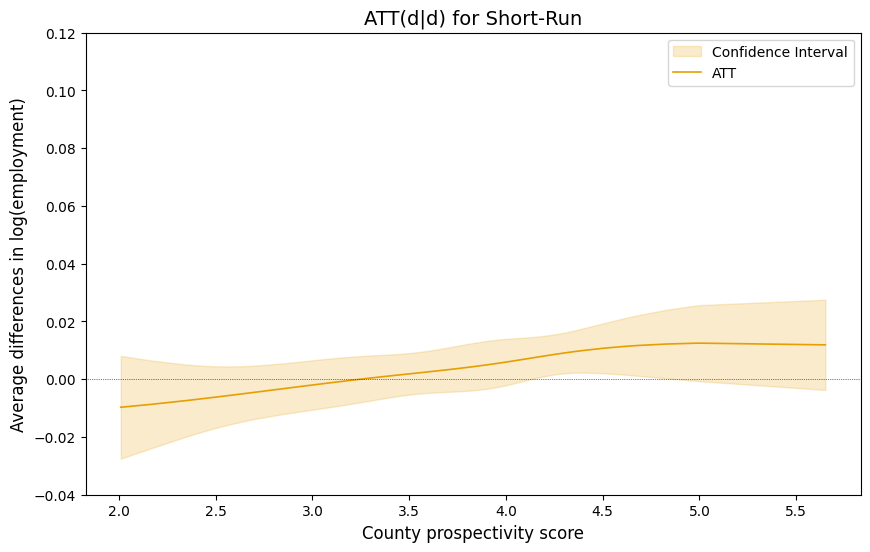

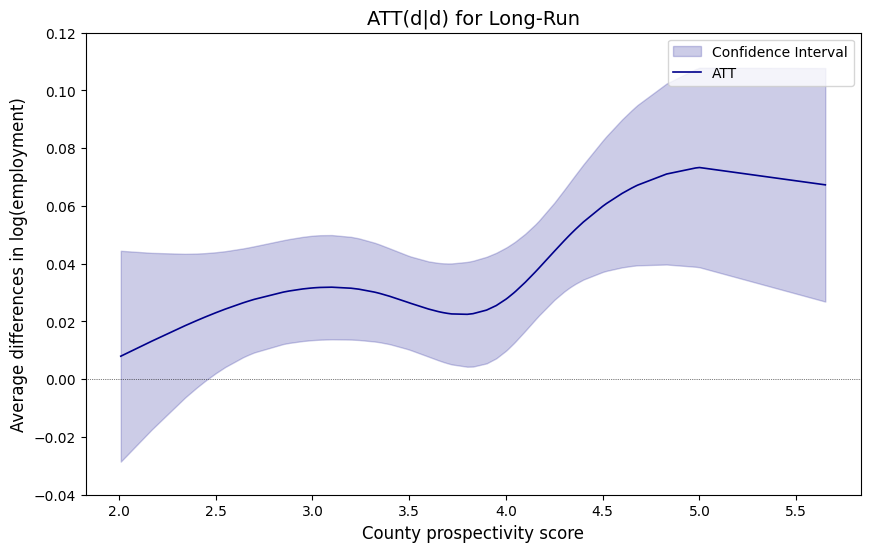

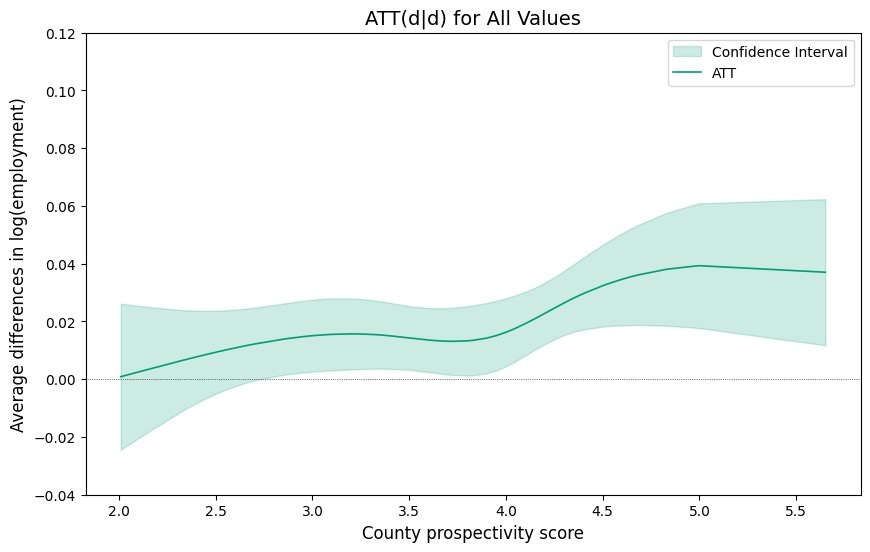

In [21]:
# Importar pacotes necessários
import matplotlib.pyplot as plt
import numpy as np

# Função para agregar os dados
def aggregate_data(data):
    # Calcular a média de 'att', 'p_lci_att', e 'p_uci_att' para cada valor único de 'd'
    aggregated_data = data.groupby('d').agg({
        'att': 'mean',
        'p_lci_att': 'mean',
        'p_uci_att': 'mean'
    }).reset_index()
    return aggregated_data

# Função para gerar o gráfico com intervalo de confiança
def plot_att_with_confidence(data, color, title, xlabel="County prospectivity score", ylabel="Average differences in log(employment)"):
    plt.figure(figsize=(10, 6))
    
    # Preenchimento do intervalo de confiança
    plt.fill_between(data['d'], data['p_lci_att'], data['p_uci_att'], color=color, alpha=0.2, label="Confidence Interval")
    # Linha central de ATT
    plt.plot(data['d'], data['att'], color=color, linewidth=1.2, label="ATT")
    
    # Linha de referência em y=0
    plt.axhline(y=0, color="black", linestyle="dotted", linewidth=0.5)
    
    # Remover linhas de grade
    plt.grid(False)
    
    # Configurações do eixo y e título
    plt.ylim(-0.04, 0.12)
    plt.yticks(np.arange(-0.04, 0.13, 0.02))
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.show()

# Agregar os dados
aggregated_SR = aggregate_data(results_cdid_SR)
aggregated_LR = aggregate_data(results_cdid_LR)
aggregated_all = aggregate_data(results_cdid_all)

# Gráficos para SR, LR e Todos os Valores
plot_att_with_confidence(aggregated_SR, color="#E69F00", title="ATT(d|d) for Short-Run")
plot_att_with_confidence(aggregated_LR, color="darkblue", title="ATT(d|d) for Long-Run")
plot_att_with_confidence(aggregated_all, color="#009E73", title="ATT(d|d) for All Values")

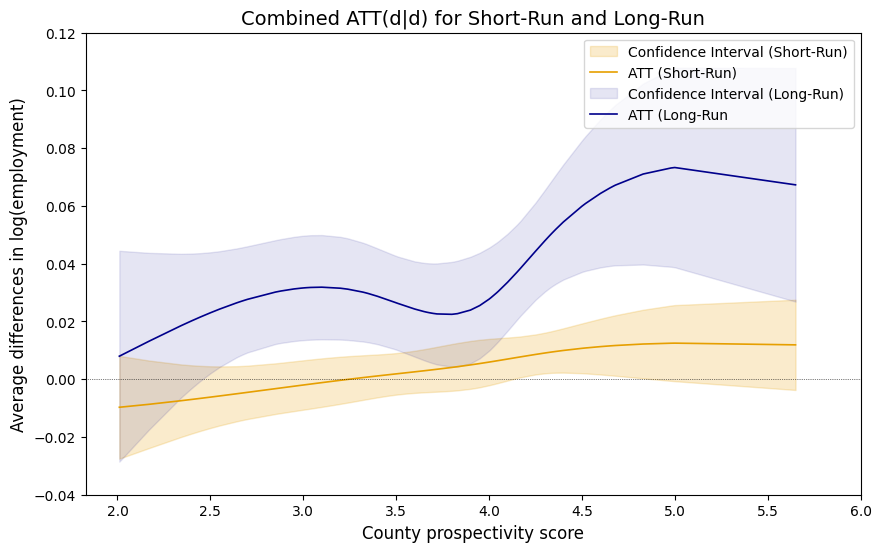

In [22]:
# Gráfico combinado para SR (Curto Prazo) e LR (Longo Prazo)
plt.figure(figsize=(10, 6))

# Curto Prazo (Short-Run)
plt.fill_between(aggregated_SR['d'], aggregated_SR['p_lci_att'], aggregated_SR['p_uci_att'], 
                 color="#E69F00", alpha=0.2, label="Confidence Interval (Short-Run)")
plt.plot(aggregated_SR['d'], aggregated_SR['att'], color="#E69F00", linewidth=1.2, label="ATT (Short-Run)")

# Longo Prazo (Long-Run)
plt.fill_between(aggregated_LR['d'], aggregated_LR['p_lci_att'], aggregated_LR['p_uci_att'], 
                 color="darkblue", alpha=0.1, label="Confidence Interval (Long-Run)")
plt.plot(aggregated_LR['d'], aggregated_LR['att'], color="darkblue", linewidth=1.2, label="ATT (Long-Run")

# Linha de referência em y=0
plt.axhline(y=0, color="black", linestyle="dotted", linewidth=0.5)

# Remover linhas de grade
plt.grid(False)

# Configurações dos eixos e título
plt.ylim(-0.04, 0.12)
plt.yticks(np.arange(-0.04, 0.13, 0.02))
plt.xticks(np.arange(2, 6.5, 0.5))
plt.xlabel("County prospectivity score", fontsize=12)
plt.ylabel("Average differences in log(employment)", fontsize=12)
plt.title("Combined ATT(d|d) for Short-Run and Long-Run", fontsize=14)
plt.legend()

# Exibir o gráfico
plt.show()
